# Gas Phase Reactions

This notebook aims to provide the students with the necessary information to solve gas phase reactor problems encountered in CKN 321

## Batch reactors

The first thing to remember regarding gas phase reactions in CKN 321 is that it will be assumed that the *IDEAL GAS LAW* applies in all cases. This is a rough approximation but should provide relatively accurate results, which could theoretically be improved upon in the CPJ report (end of final year) by applying interactional models.

The ideal gas law:

$$ PV = NRT $$

This provides that necessary tools to predict the behaviour of reactions in a gas phase reaction by considering the inflence of the reactor pressure, temperature, volume and number of molecules present in the reactor as the reaction proceeds

A small reaction bomb fitted with a sensitive pressure-measuring device is flushed out and filled with a mixture at 76.94% reactant A and 23.06% inert at 1 atm pressure and 14°C, a temperature low enough that the reaction does not proceed to any appreciable extent.

The temperature is raised rapidly to 100°C, and the readings in the table are obtained. The stoicheometry of the reaction is 

$$A \to 2R$$

and after sufficient time the reaction proceeds to completion. Find a rate equation in units of moles, liters and minutes which will satisfactorily fit the data.

|t (min)|P (atm)|
|----|----|
|0.5|1.5|
|1.0|1.65|
|1.5|1.76|
|2.0|1.84|
|2.5|1.90|
|3.0|1.95|
|3.5|1.99|
|4.0|2.025|
|5.0|2.08|
|6.0|2.12|
|7.0|2.15|
|8.0|2.175|

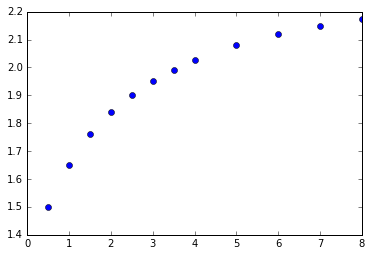

In [426]:
from numpy import array
from matplotlib import pyplot as plt
%matplotlib inline
Data = array([[0.5,1.5],
                 [1.0,1.65],
                 [1.5,1.76],
                 [2.0,1.84],
                 [2.5,1.90],
                 [3.0,1.95],
                 [3.5,1.99],
                 [4.0,2.025],
                 [5.0,2.08],
                 [6.0,2.12],
                 [7.0,2.15],
                 [8.0,2.175]])
te = Data[:, 0]
Pe = Data[:, 1]
plt.plot(te, Pe, 'o')

How to solve this???

Hints:
1. Remember the ideal gas law
2. Remember the mole balance
3. Remember the pressure at time 0 is important
4. Remember to make a link between the pressure in the reactor and the reaction rate... compare apples with apples

## My solution

Note: This is not the only solution, this just happens to be a solution that I was able to come up with

From the data it is clear that we require the initial conditions for the reactor at time 0 in order to determine solve the differential equation which is inherently part of the batch reactor mole balance:

$$ \frac{dNA}{dt} = r_AV $$

Ideal gas law:

$$ PV=NRT$$

In this case we assume the reactor to be a rigid structure with constant volume which would result in an increased pressure as the reaction proceeds to completion. 

This means the known parameters are:

|Parameter|$t_{o,no\:reaction}$|$t_{o, just\:before\:reaction}$|
|---|---|---|
|Temp ($^o$C)|14|100|
|$y_A$|0.7694|0.7694|
|$y_I$|0.2306|0.2306|
|$P_{tot}$ (atm)|1|?|

Considering no change in volume we can convert the ideal gas law by cancelling constant terms:

$$ \frac{P_2V_2=N_2RT_2}{P_1V_1=N_1RT_1} $$

reduces to:

$$ \frac{P_2}{P_1}=\frac{T2}{T1} $$

$$ P_2 =P_1\frac{T_2}{T_1}$$

In [427]:
P1 = 1 #atm

Ptoto = P1*(100+273.15)/(14+273.15)

print('Ptoto=', Ptoto, 'atm')

Ptoto= 1.2994950374368797 atm


The basic mole balance can now be used as a starting point:

$$ \frac{dN_A}{dt}=r_AV$$

Assume the reaction rate can be described by a power law function:

$$ r_A = -kC_A^n = -k\left(\frac{N_A}{V}\right)^n$$

We know from the stoichiometric equation that:
$$ A\to2R$$

therefore:

$$ r_R = -2r_A$$

***FOR EVERY ONE A, 2 R IS MADE***




The ideal gas law for the reaction would be:

$$ P_2 = P_1\frac{\sum(N_{i,2})}{\sum(N_{i,1})}=P_1\frac{N_{A,2}+N_{R,2}+N_{I,2}}{N_{A,1}+N_{R,1}+N_{I,1}} $$

This equation would provide the required output of pressure, as the reaction proceeds.

All we need is to determine the total number of moles in the reactor initially and as a function of time. This can be done by solving the $N_A(t)$, $N_R(t)$. 

So the missing bit is the total molecules at time 0. Using the ideal gas law we would require the reactor volume, reactor pressure and reactor temperature. Of these we know the pressure and temperature, which leads us to the question of whether this actually matters?

If we use the molecular density $\left(\frac{N_{tot}}{V}\right)$ we can avoid the unknown volume. We could also choose a basis for either the initial molecules or the volume. 

In this case I will decide on a volume of 1 L...I will show below what the answer would be if I choose 1 mol $N_{tot}$

For V = 1L:

In [428]:
P = Ptoto*101.325 #kPa
V = 1 #L
R = 8.314 #kPa.L/mol.K
T = 100+273.15 #K

Ntoto = P*V/(R*T)

print('Ntoto=', Ntoto, 'mol')

Ntoto= 0.042442188670681336 mol


This means that the initial $N_{Ao}$ and $N_I$ were

In [429]:
NAo = 0.7694*Ntoto
NI = 0.2306*Ntoto
NRo = 0

print('NAo =', NAo, 'mol,', 'NI =', NI, 'mol,', 'NRo =', NRo, 'mol,')

NAo = 0.03265501996322222 mol, NI = 0.009787168707459116 mol, NRo = 0 mol,


Remember the rate expression:
$$ r_A = -kC_A^n = -k\left(\frac{N_A}{V}\right)^n$$

Define the differential equations:

$$\frac{dN_A}{dt} = r_AV$$
$$\frac{dN_R}{dt} = -2r_AV$$


In [430]:
def ri(NA):
    return -k*(NA/V)**n

def diffs(var, t): #remember to describe the dependent variable and then the independent variable   
    NA = var[0]
    NR = var[1]
    rA = ri(NA)
    rR = -2*rA
    dNAdt = rA*V
    dNRdt = rR*V
    return [dNAdt, dNRdt]

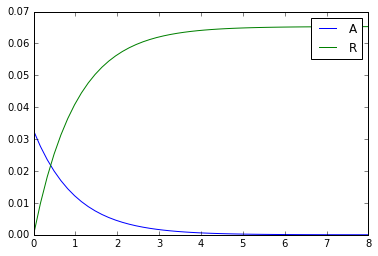

In [431]:
from scipy.integrate import odeint
from numpy import linspace

def sol(k, n):
    tspan = linspace(0, 8)
    var = odeint(diffs, [NAo, NRo], tspan)
    return var 

k = 1
n = 1
tspan = linspace (0, 8)

var = sol(k, n)
NA = var[:, 0]
NR = var[:, 1]

plt.plot(tspan, var)
plt.legend(['A', 'R'])


Now that we have the $N_A$ and $N_R$ amounts, we can calculate the pressure in the system:

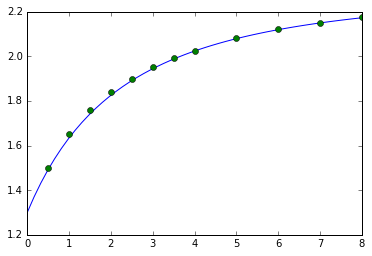

In [432]:
k = 2.5 #
n = 1.5 #

var = sol(k, n)
NA = var[:, 0]
NR = var[:, 1]

Ptot = Ptoto*(NA+NR+NI)/(Ntoto)
plt.plot(tspan, Ptot, '-', te, Pe, 'o')

## What if we differentiated the ideal gas law with time??? Solve P(t)...

$$ PV = NRT $$

$$ \frac{dP}{dt}=\frac{RT}{V}\frac{dN_{tot}}{dt}$$

$$=\frac{RT}{V}\left[\frac{dN_A}{dt}+\frac{dN_R}{dt}\right]$$

$$=\frac{RT}{V}(r_AV-2r_AV)$$

$$\frac{dP}{dt}=RT(-r_A) $$


This means we can solve P as a function of $N_A$, which means we can add this as just another variable in the differential equation function:

In [433]:
def ri(NA):
    return -k*(NA/V)**n

def diffs(var, t): #remember to describe the dependent variable and then the independent variable
    NA = var[0]
    NR = var[1]
    P = var[2]
    rA = ri(NA)
    rR = -2*rA
    dNAdt = rA*V
    dNRdt = rR*V
    dPdt = R*T*-rA
    return [dNAdt, dNRdt, dPdt]

We still need to choose a base for our system, which I will choose as $N_{tot,o}$=1 mol

In [434]:
P = Ptoto*101.325 #kPa
Ntoto = 1 #mol
R = 8.314 #kPa.L/mol.K
T = 100+273.15 #K

V = Ntoto*R*T/(P)

print('V=', V, 'l')

V= 23.561461633358004 l


This means that the initial $N_{Ao}$ and $N_I$ were

In [435]:
NAo = 0.7694*Ntoto
NI = 0.2306*Ntoto
NRo = 0

print('NAo =', NAo, 'mol,', 'NI =', NI, 'mol,', 'NRo =', NRo, 'mol,')

NAo = 0.7694 mol, NI = 0.2306 mol, NRo = 0 mol,


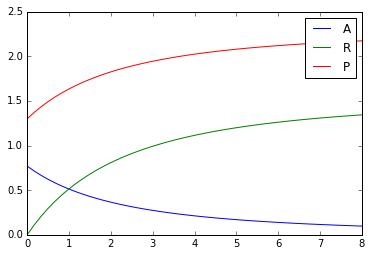

In [436]:
from scipy.integrate import odeint
from numpy import linspace

def sol(k, n):
    tspan = linspace(0, 8)
    var = odeint(diffs, [NAo, NRo, Ptoto*101.325], tspan)
    return var 

var = sol(1, 1)
NA = var[:, 0]
NR = var[:, 1]
P = var[:, 2]

plt.plot(tspan, NA, tspan, NR, tspan, P/101.325)
plt.legend(['A', 'R', 'P'])


Now that we have the $N_A$ and $N_R$ amounts, we can calculate the pressure in the system:

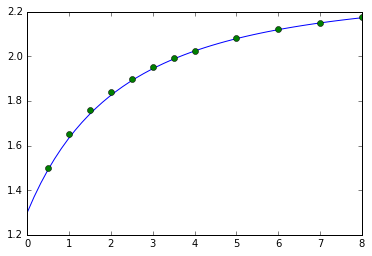

In [437]:
k = 2.5 #
n = 1.5 #

var = sol(k, n)
NA = var[:, 0]
NR = var[:, 1]

Ptot = Ptoto*(NA+NR+NI)/(Ntoto)
plt.plot(tspan, Ptot, '-', te, Pe, 'o')

## Now let's look at a choice of $N_{tot,o}$ = 1 mol

In [438]:
P = Ptoto*101.325 #kPa
Ntoto = 1 #mol
R = 8.314 #kPa.L/mol.K
T = 100+273.15 #K

V = Ntoto*R*T/(P)

print('V=', V, 'mol')

V= 23.561461633358004 mol


This means that the initial $N_{Ao}$ and $N_I$ were

In [439]:
NAo = 0.7694*Ntoto
NI = 0.2306*Ntoto
NRo = 0

print('NAo =', NAo, 'mol,', 'NI =', NI, 'mol,', 'NRo =', NRo, 'mol,')

NAo = 0.7694 mol, NI = 0.2306 mol, NRo = 0 mol,


In [440]:
def ri(NA):
    return -k*(NA/V)**n

def diffs(var, t): #remember to describe the dependent variable and then the independent variable
    NA = var[0]
    NR = var[1]
    rA = ri(NA)
    rR = -2*rA
    dNAdt = rA*V
    dNRdt = rR*V
    return [dNAdt, dNRdt]

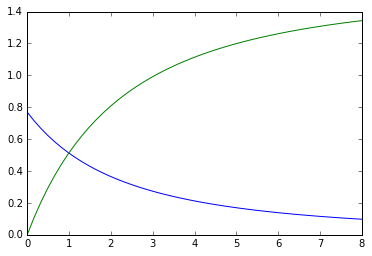

In [441]:
from scipy.integrate import odeint
from numpy import linspace

def sol(k, n):
    tspan = linspace(0, 8)
    var = odeint(diffs, [NAo, NRo], tspan)
    return var 

var = sol(1, 1)
NA = var[:, 0]
NR = var[:, 1]
plt.plot(tspan, var)


Now that we have the $N_A$ and $N_R$ amounts, we can calculate the pressure in the system:

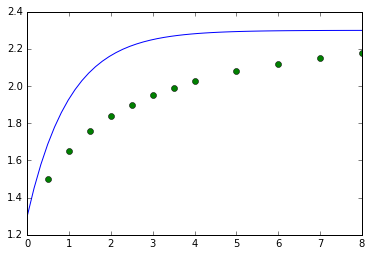

In [442]:
k = 1 #
n = 1 #

var = sol(k, n)
NA = var[:, 0]
NR = var[:, 1]

Ptot = Ptoto*(NA+NR+NI)/(Ntoto)
plt.plot(tspan, Ptot, '-', te, Pe, 'o')

## Tutorial questions:

- The following irreversible and spontaneous gas-phase reaction occurs in a constant volume batch reactor (of 1L) at 100C and an initial pressure of 2 bar.

$$ 2A+3B\to C+2D$$

The reactor was initially charged with 20% inert, 40% A and 40% B. The inert mole fraction was monitored as a function oftime and the following results were obtained:

a. What will be the total pressure at infinite time? 

b. What is the conversion at 24 minutes? 

c. Draw the plot of the total moles as a function of time.

d. Determine the kinetics for the reaction at 100C. 

|Time (min)|Inert mole fraction|
|---|---|
|0|0.200|
|8|0.209|
|16|0.218|
|24|0.228|
|32|0.240|
|40|0.252|
|48|0.266|
($k = 5 \times 10^{-4}$ (units!))

In [443]:
#a
#20% inert, 40% A and 40% B

Po = 2 #bar
Po = Po*100 #kPa
V = 1 #L
T = 100 #C
T = T+273.15 #K
R = 8.314 #kPa.L/molK

Nto = Po*V/(R*T)
NAo = Nto*0.4
NBo = Nto*0.4
NI = Nto*0.2
[Nto, NAo, NBo, NI]


[0.06446686179281505,
 0.025786744717126022,
 0.025786744717126022,
 0.012893372358563011]

At 100 % conversion of the limiting reagent B, a total of $N_{Bo}$ of B will react with $\frac{2}{3} N_{Bo}$ and form $\frac{1}{3} N_{Bo}$ of C and $\frac{2}{3} N_{Bo}$ of D. This leave a total molecules in the reactor of:
$N_{Ao}-\frac{2}{3} N_{Bo}+\frac{1}{3} N_{Bo}+\frac{2}{3} N_{Bo}+N_I$ = $N_{Ao}+\frac{1}{3} N_{Bo}+N_I$

In [444]:
Nt = NAo+1/3*NBo+NI
P = Po*(Nt/Nto)
[P, P/100, Nt]

[146.66666666666669, 1.4666666666666668, 0.04727569864806437]

Therefore the pressure in the reactor at infinite time will be 147 kPa or 1.47 bar

b)

From the data the inert fraction at 24 minutes are 0.228. This means that: 
$$ \frac{N_I}{N_t} = 0.228 $$ 
We know the number of moles of Inert at all times (this does not change). This means we can determine the total number of molecules:
$$ Nt = \frac{NI}{0.228} $$

In [445]:
Nt24 = NI/0.228
Nt24

0.05654987876562724

We further know the stoichiometry of the reaction and can therefore determine the number of molecules of B as related to the total molecules in the reactor in the reactor:

$$ N_t = N_A + N_B + N_C + N_D + N_I $$
$$ N_A = N_{Ao} + \Delta N_A = N_A + \frac{2}{3} \Delta N_B $$
$$ N_B = N_{Bo} + \Delta N_B $$
$$ N_C = \Delta N_C = -\frac{1}{3} \Delta N_B $$
$$ N_D = \Delta N_D = -\frac{2}{3} \Delta N_B $$

This means the number of molecules in the reactor at any time can be related to the change in molecules of B (the limiting reagent). This same could have been done with respect to any other reagent/product but would not have been particularly useful in calculating the conversion which is related to the limiting reagent.

$$ N_t = N_{Ao} + \frac{2}{3} \Delta N_B + N_{Bo} + \Delta N_B -\frac{1}{3} \Delta N_B -\frac{2}{3} \Delta N_B +N_I $$

$$ N_t = N_{Ao}+N_{Bo}+N_I+\frac{2}{3}\Delta N_B = N_{to}+\frac{2}{3}\Delta N_B $$

$$ \Delta N_B = \frac{3}{2} (N_t-N_{to}) $$

$$ x = - \frac{\Delta N_B}{N_{Bo}} $$

In [446]:
ΔNB = 3/2*(Nt24-Nto)

x = -ΔNB/NBo

[ΔNB, x]

[-0.011875474540781715, 0.46052631578947345]

c)

The total molecules can be determine by using the equation above:
$$ Nt = \frac{NI}{Inert\:mole\:fraction} $$

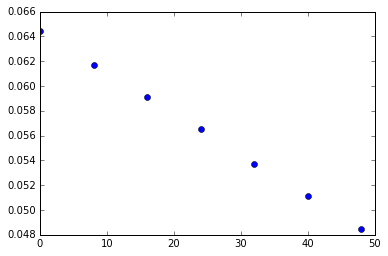

In [447]:
YI = array([0.200, 0.209,0.218,0.228,0.240,0.252,0.266])
t = array([0, 8, 16, 24, 32, 40, 48])
Nt = NI/YI
Nt

plt.plot(t, Nt, 'o')

The mole balances for the batch reactor:

$$ \frac{dN_i}{dt} = r_i V $$

We can "guess" a simple power law applies in this system, at least as an initial guess:

$$ r_B = -kC_A^mC_B^n = -k\left(\frac{N_A}{V}\right)^m\left(\frac{N_B}{V}\right)^n $$

We can further determine the relative rates of production of all the reagents and products relative to B:

$$ r_A = \frac{2}{3} r_B $$
$$ r_C = -\frac{1}{3} r_B $$
$$ r_D = -\frac{2}{3} r_B $$

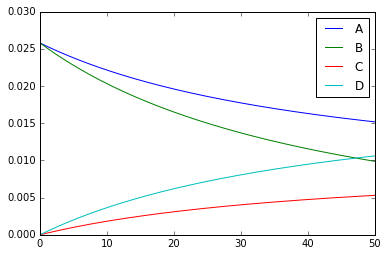

In [448]:
def ri(N):
    [NA, NB, NC, ND] = N
    
    rB = -k*(NA/V)**m*(NB/V)**n
    rA = (2/3)*rB
    rC = -(1/3)*rB
    rD = -(2/3)*rB
    
    return [rA, rB, rC, rD]

def mole(N, t):
    [NA, NB, NC, ND] = N
    [rA, rB, rC, rD] = ri(N)
    
    dNAdt = rA*V
    dNBdt = rB*V
    dNCdt = rC*V
    dNDdt = rD*V
    
    return [dNAdt, dNBdt, dNCdt, dNDdt]

k = 1 #
m = 1
n = 1
V = 1 #L
tspan = linspace(0, 50, 1000)

def fit(k, m, n):
    
    No = [NAo, NBo, 0, 0]
    return odeint(mole, No, tspan)
    

N = fit(k, m, n)
plt.plot(tspan, N)
plt.legend(['A', 'B', 'C', 'D'])    

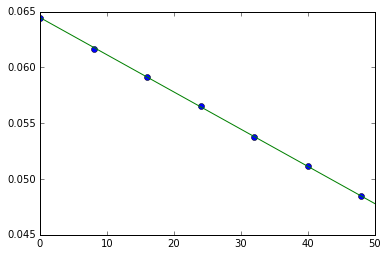

In [449]:
k = 0.0005
m = 0
n = 0

N = fit(k, m, n)

from numpy import sum
Ntt = sum(N, axis=1)+NI

plt.plot(t, Nt, 'o', tspan, Ntt)

- The following irreversible gas-phase reaction occurs spontaneously at 100°C.
$$ A\to 2B+3C$$

The device is used as a detonator that sets off a bomb when the pressure reaches 2 bar in the vessel. The initial charge consists out of a mixture of A and C at atmospheric pressure (1 bar) and 100°C. You can assume that the vessel operates isothermally. The reaction rate constant at 100°C is known to be 43.76 l/mol/s. You need to determine the feed mixture composition (of A and C) that will result in detonation after exactly 2 minutes. ($y_{Ao}$ = 0.53)




Mole balance:
$$ \frac{dN_A}{dt} = r_AV $$
$$ k = 43.76 \frac{l}{mol.s}$$

Ideal gas law:
$$ PV = NRT $$
$$P = 1 bar$$
$$T = 100 ^o C$$
$$V = ?$$
$$N = ?$$

From units of k we can determine the order of the reaction as second order:
$$ r_A = -kC_A^n $$
$$ \frac{mol}{l.s} = \left(\frac{l}{mol.s}\right)\left(\frac{mol}{l}\right)^n $$
Therefore n = 2

The algorithm:

Rates:

$$ r_A = -kC_A^n = -k\left(\frac{N_A}{V}\right)^n $$
$$ r_B - -2r_A$$
$$ r_C = -3r_A$$

Mole balance:

$$\frac{dN_i}{dt} = r_iV$$

$$PV = NRT$$
$$\frac{dP}{dt} = \frac{RT}{V}\frac{dNt}{dt} = \frac{RT}{V}\left(\frac{dNA}{dt}+\frac{dNB}{dt}+\frac{dNC}{dt}\right) $$





This time we need to fit the $N_{Ao}$ so the total pressure at 2 minutes will equal 2 bar

In this case we can again see that the system is underspecified which means we need to choose a base:

I choose a base of 1 L volume for no apparent reason...

3.2233430896407524
100.995009615 0.00527402747


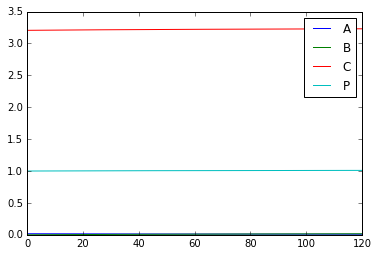

In [450]:
def r(var): 
    NA, NB, NC, P = var
    rA = -k*(NA/V)**2
    rB = -2*rA
    rC = -3*rA
    return [rA, rB, rC]

def dvardt(var, t):
    NA, NB, NC, P = var
    rA, rB, rC = r(var)
    dNAdt = rA*V
    dNBdt = rB*V
    dNCdt = rC*V
    dPdt = R*T/V*(dNAdt+dNBdt+dNCdt)
    return [dNAdt, dNBdt, dNCdt, dPdt]

Po = 1 #bar
Po = Po*100 #kPa
T = 100 #C
T = T+273.15 #K
V = 100 #L
R = 8.314 #kPa.L/K.mol
k = 43.76 #l/mol.s

Nto = Po*V/(R*T)
print(Nto)
NAo = 0.017 #mol
NCo = Nto-NAo
NBo = 0
tspan = linspace(0, 2*60, 10000)

var = odeint(dvardt, [NAo, NBo, NCo, Po], tspan)

plt.plot(tspan, var[:, 0:3], tspan, var[:, 3]/100)
plt.legend(['A', 'B', 'C', 'P'])

print (var[-1,3], NAo/(Nto))

[ 2.00090139]


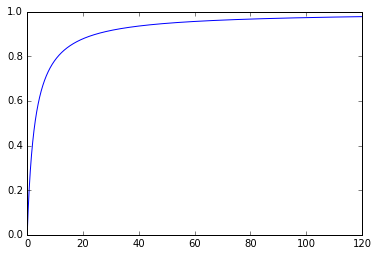

In [451]:
def dxdt(x, t):
    return k*CAo*(1-x)**2

y = 0.256
CAo = y*100/(R*T)


x = odeint(dxdt, 0, tspan)

plt.plot(tspan, x)

PopPo = (1+4*y*x[-1])

print(PopPo)


- The first-order homogeneous gaseous decomposition $A \to 2,5 R$ is carried out in an isothermal batch reactor at 2 atm with 20% inerts present, and the volume increases by 60% in 20 min. In a constant-volume reactor, find the time required for the pressure to reach 8atm if the initial pressure is 5 atm, 2 atm of which consists of inerts. (t=31.7 min)


P = 2 atm
$$ y_{inert} = 0.2 $$
$$\frac{V}{V_o} = 1.6 $$

Mole balance:
$$ \frac{dN_i}{dt} = r_i V $$

Ideal gas law:

$$\frac{V}{V_o}= \frac{N}{N_o} $$
$$\frac{dV}{dt} = \frac{V_o}{N_{to}}\sum\frac{dN_i}{dt} = \frac{V_o}{N_{to}}\left(\frac{dN_A}{dt}+ \frac{dN_R}{dt}\right) $$

Assume:
$$ r_A = -kC_A^n = -k\left(\frac{N_A}{V}\right)^n$$

24.374548953572287
1.6017092354
k= 0.0348 1/min


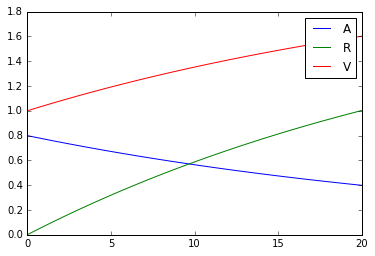

In [452]:
def ri(var):
    NA, NR, V = var
    rA = -k*(NA/V)**n
    rR = -2.5*rA
    return [rA, rR]

def diffs(var, t):
    NA, NR, V = var
    rA, rR = ri(var)
    dNAdt = rA*V
    dNRdt = rR*V
    dVdt = Vo/No*(dNAdt+dNRdt)
    return [dNAdt, dNRdt, dVdt]

Vo = 1 #L (chosen base)
No = 1 #mol (Chosen base)
NAo = 0.8*No
P = 2 #atm
P = P*101.325 #kPa
R = 8.314 #kPa.L/(mol.K)
T = (P*Vo)/(No*R)
print(T)

k = 0.0348
n = 1
tspan =linspace(0, 20)
var = odeint(diffs, [NAo, NRo, Vo], tspan)

plt.plot(tspan, var)
plt.legend(['A', 'R', 'V'])

print (var[-1, 2]/Vo)
print('k=', k, '1/min')

Redefine the algorithm to apply to a constant volume reactor:

Mole balance:
$$ \frac{dN_i}{dt} = r_i V $$

Ideal gas law:

$$\frac{P}{P_o}= \frac{N}{N_o} $$
$$\frac{dP}{dt} = \frac{P_o}{N_{to}}\sum\frac{dN_i}{dt} = \frac{P_o}{N_{to}}\left(\frac{dN_A}{dt}+ \frac{dN_R}{dt}\right) $$

Rates:
$$ r_A = -kC_A^n = -k\left(\frac{N_A}{V}\right)^n$$
$$ r_R = -2.5r_A $$

24.4 2.4973923108168328 1
15.867495 202.8616 -0.0521455514499 0.130363878625 -0.0521455514499 0.130363878625
15.8674516829 202.8616 -0.0521454090962 0.13036352274 -0.0521454090962 0.13036352274
15.867451683 202.8616 -0.0521454090966 0.130363522741 -0.0521454090966 0.130363522741
15.8674083659 202.8616 -0.0521452667432 0.130363166858 -0.0521452667432 0.130363166858
15.8674083661 202.8616 -0.0521452667436 0.130363166859 -0.0521452667436 0.130363166859
15.8264026857 202.8616 -0.0520105092525 0.130026273131 -0.0520105092525 0.130026273131
15.8264026169 202.8616 -0.0520105090267 0.130026272567 -0.0520105090267 0.130026272567
15.7855029753 202.8616 -0.0518761000119 0.12969025003 -0.0518761000119 0.12969025003
15.785502838 202.8616 -0.0518760995607 0.129690248902 -0.0518760995607 0.129690248902
15.7447088923 202.8616 -0.0517420378961 0.12935509474 -0.0517420378961 0.12935509474
15.7447087554 202.8616 -0.0517420374461 0.129355093615 -0.0517420374461 0.129355093615
15.5471197345 202.8616 -0.051

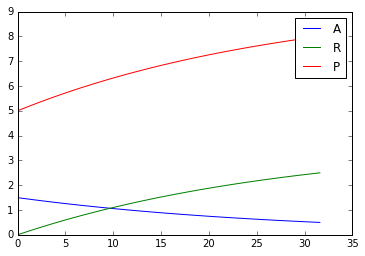

In [479]:
Po = 5 #atm
Po = Po*101.325 #kPa
R = 8.314 #kPa.L/mol.K
Vo = 1 #L
Nto = Po*V/(R*T)
#Nto = 10 #mol
NAo = 3/5*Nto
NRo = 0
print(T, Nto, Vo)


tfinal = 31.6 #min
tspan = linspace(0, tfinal)

def ri(var):
    NA, NR, P = var
    rA = -k*(NA/Vo)**n
    rR = -2.5*rA
    return [rA, rR]

def diffs(var, t):
    NA, NR, P = var
    rA, rR = ri(var)
    dNAdt = rA*Vo
    dNRdt = rR*Vo
    dPdt = (Po/Nto)*(dNAdt+dNRdt)
    print(dPdt, Po/Nto, dNAdt, dNRdt, rA, rR)
    return [dNAdt, dNRdt, dPdt]

var = odeint(diffs, [NAo, NRo, Po], tspan)

plt.plot(tspan, var[:, 0:2], tspan, var[:, 2]/101.325)
plt.legend(['A', 'R', 'P'])

print('Pfinal=', var[-1, 2]/101.325, 'atm,', 'tfinal=', tfinal, 'min')
print(var[-1, :], k, n, (Po/Nto)*(var[-1, 0]+var[-1,1]+(Nto*2/5)))

## Continuous flow reactors

Continuous flow reactors are similar to batch reactors, HOWEVER in this case the ideal gas law needs to be written in terms of flow rates:
$$ PQ = FRT $$

This modified ideal gas law introduces the concept of time on both sides, with Q the volumetric flow (volume per time through the reactor) and F the molar flow (moles per time through the reactor).

Another major difference between the batch reactor and continuous flow (CSTR/PFR/PBR) is that the pressure in this reactor is ***ONLY*** a function of friction in the reactor and does not change as a result of molar expansion (more molecules produced in the reaction). In this subject (CKN321) the momentum balance (pressure drop) is not considered and therefore we assume pressure drop to be negligible. This will be considered in the following subject (CRO410).

The implication of the previous point is that ***ONLY*** a single parameter, the volumetric flowrate Q, will be influenced by the molecular expansion in the case of gas phase reactions. Therefore, for **isothermal** reactions with **negligible pressure** drop the following equation can be derived:
$$ \frac{Q_2}{Q_1} = \frac{F_2}{F_1} $$

This equation simplifies the solution of gas phase reactions significantly as long a the conditions at some point in the reactor is known (note it does not necessarily have to be the inlet conditions).

Let's consider an example problem:
A high molecular weight hydrocarbon gas A is fed continuously to a heated high temperature mixed reactor where it thermally cracks (homogeneous gas reaction) into lower molecular weight materials, collectively called R, by a stoichiometry approximated by 

$$A \to 5R. $$

By changing the feed rate, different extents of cracking are obtained as follows:

|$F_A0$, millimol/hr |300| 1000| 3000| 5000|
|---|---|---|---|---|
|$C_{A,out}$ millimol/l| 16| 30| 50| 60|

The internal void volume of the reactor is V = 0,1 l, and at the temperature of the reactor, the feed concentration is $C_{A0} = 100 millimol/l$. Find a rate equation to represent the cracking reaction.

In this case we have a CSTR operated at various conditions:

The CSTR mole balance is:

$$ F_{Ao} - F_A = -r_AV $$

We know that in all cases the inlet concentration is $C_{Ao}$ = 100 mmol/l. This means we can get the volumetric flowrates into the reactor using:

$$ Q_o = F_{Ao}/C_{Ao} $$

We also know the outlet concentrations can be expressed as:
$$ C_{A,out} = \frac{F_{A,out}}{Q_{out}} $$

This leads back to the ideal gas law:

$$ PQ = FRT $$

or

$$ \frac{F_t}{F_{to}} = \frac{Q}{Q_o} $$

or 

$$ Q_out = Q_o \frac{F_t}{F_{to}} $$
$$F_t = F_A+5(F_{Ao}-F_A)$$

This rewrites the entire mole balance as a function of $F_A$


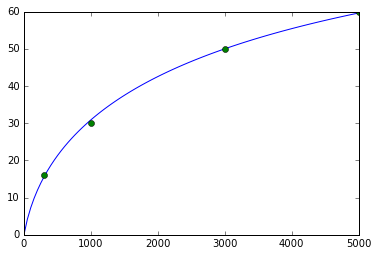

In [400]:
from scipy.optimize import fsolve
from numpy import append
def r(FA):
    Ft = FA+5*(FAo-FA)
    Q = Qo*(Ft/FAo)
    CA = FA/Q
    return -k*CA**n


def func(FA):
    rA = r(FA)
    func1 = FAo-FA+rA*V
    return func1

FAe = array([])
CAo = 100 #mmol/L
k = 100
n = 1
V = 0.1 #L
FAoe = linspace(0.1, 5000, 100)

for FAo in FAoe:
    Qo = FAo/CAo
    FAe = append(FAe, fsolve(func, FAo/2))

Fte = FAe+5*(FAoe-FAe)
Qe = Qo*(Fte/FAo)
CAe = FAe/Qe
    
plt.plot(FAoe, CAe,  [300, 1000, 3000, 5000], [16, 30, 50, 60], 'o')
    
    
    

# Tutorial:

## Question 1
The following gas phase reaction occurs in a piston reactor (constant pressure batch):
$$2A+B \to 4C $$
The initial mixture consists out of a mixture of A:B:inerts of 30:40:20.
1. Assuming $r_A = -kC_AC_B$ derive a set of equations to determine how the concentration of A changes with time. Leave the answers in differential equation form. [7]
2. If the reaction is performed at 25°C and 1 bar at what time will the piston be moving the fastest? [4]
3. If the initial feed were fed to a constant volume reactor (same pressure and temperature) will the conversion of A at a certain time be higher or lower than that of the piston reactor? Show graphs to answer this question. [4]

## Question 2

The following homogeneous **first order** gas phase reaction:
$$ A \to 12B $$
occurs in a constant pressure batch reactor. At 200°C and 20 bar it takes 3.5 minutes to
convert 80% of a pure A feed. If the reaction is performed in a constant volume reactor
(starting with pure A at 200°C and 20 bar), how long will it take to convert 90% of A.

0.508418249561216
0.800112394507


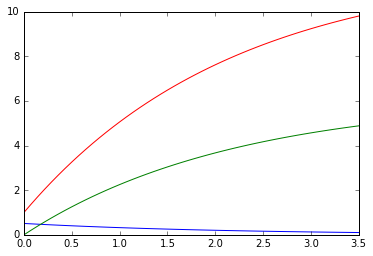

In [401]:
from scipy.integrate import odeint
from numpy import linspace
import matplotlib.pyplot as plt
% matplotlib inline

T = 200 #C
T = T+273.15 #K
P = 20 #bar
P = P*100 #kPa
t = 3.5 #min
x = 0.8 
Vo = 1 #L chosen base
R = 8.314 #kPa.L/mol.K
Nto = P*Vo/(R*T)
NAo = Nto
print(NAo)
tspan = linspace(0, 3.5)

def ri(var):
    NA, NB, V = var
    rA = -k*(NA/V)
    rB = -12*rA
    return [rA, rB]

def diffs(var, t):
    NA, NB, V = var
    rA, rB = ri(var)
    dNAdt = rA*V
    dNBdt = rB*V
    dVdt = Vo/Nto*(dNAdt+dNBdt)
    
    return [dNAdt, dNBdt, dVdt]
k = 0.46 #1/min
var = odeint(diffs, [NAo, NBo, Vo], tspan)
NA1 = var[:, 0]
plt.plot(tspan, var)
print((NAo-NA1[-1])/NAo)

0.899741156435


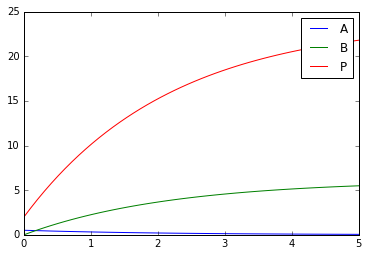

In [402]:
def ri(var):
    NA, NB, P = var
    rA = -k*(NA/V)
    rB = -12*rA
    return [rA, rB]

def diffs(var, t):
    NA, NB, P = var
    rA, rB = ri(var)
    dNAdt = rA*V
    dNBdt = rB*V
    dPdt = Po/Nto*(dNAdt+dNBdt)
    
    return [dNAdt, dNBdt, dPdt]

T = 200 #C
T = T+273.15 #K
Po = 20 #bar
Po = Po*100 #kPa
t = 3.5 #min
x = 0.8 
V = 1 #L chosen base
R = 8.314 #kPa.L/mol.K
Nto = Po*V/(R*T)
NAo = Nto
tspan = linspace(0, 5)

k = 0.46 #1/min
var = odeint(diffs, [NAo, NBo, Po], tspan)
NA2 = var[:, 0]
plt.plot(tspan, var[:, 0:2], tspan, var[:, 2]/1000)
plt.legend(['A', 'B', 'P'])
print((NAo-NA2[-1])/NAo)

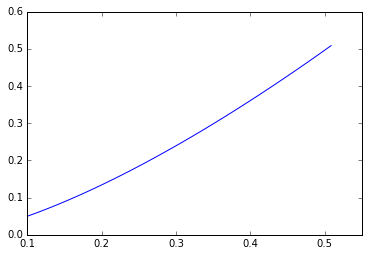

In [403]:
plt.plot(NA1, NA2)

## Question 3

The following gas phase reaction is performed at 25°C,
$$ C\to 4D $$
Three runs were done in different sized CSTR’s with different feeds. The following data
were obtained:

|$Q_o $(l/h)|Pressure (kPaa)|Fraction C in feed|Conversion percent| Volume (L)|
|---|---|---|---|---|
|1|200|0.8|70|0.7|
|2|250|0.4|50|6.3|
|1.5|160|0.5|64|2.4|

What size CSTR should be used to obtain the following:

|$Q_o $(l/h)|Pressure (kPaa)|Fraction C in feed|Conversion percent|
|---|---|---|---|
|4|80|0.6|37.5|

Mole balance:
$$ F_{Co}-F_C=-r_CV$$
$$ r_C = \frac{F_C-F_{Co}}{V} $$

What is $r_C = f(C_C)$?

$$PQ = F_{to}RT$$

$$F_{to} = \frac{PQ}{RT} $$

$$F_{Co} = y_{Co}F_{to} $$

$$ F_C = x_CF_{Co} $$

$$ C_C = \frac{F_C}{Q}$$

$$ Q = Q_o\frac{F_t}{F_{to}}$$

$$ F_t  = F_C + F_D$$

$$ F_D = F_{Do}+4(F_{Co}-F_C) $$

$$ln(-r_C) = nln(C_C)+ln(k)$$
$$y = mx+c$$




[-0.01411963 -0.03667435 -0.0091125 ] [ 0.0072254   0.01260681  0.00592777]
[ 1.81691696  4.65245573] k= 104.842133466 n= 1.81691696486


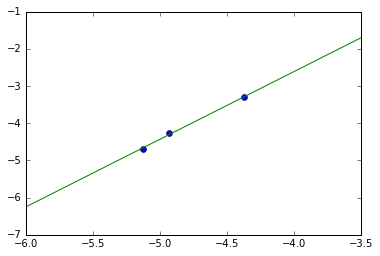

In [414]:
from numpy import array, append, log, polyfit, linspace, exp

Qo = array([1, 2, 1.5])
P = array([200, 250, 160]) #kPa
yCo = array([0.8, 0.4, 0.5])
xC = array([0.7, 0.5, 0.64])
V = array([3.2, 1.1, 3.4]) #L

R = 8.314
T = 25 #C
T = T+273.15 #K

Fto = array([])
FCo = array([])
FDo = array([])
FC = array([])
FD = array([])
rC = array([])
Q = array([])
CC = array([])

for i in range(3):
    Fto = append(Fto, P[i]*Qo[i]/(R*T))
    FCo = append(FCo, yCo[i]*Fto[i])
    FDo = append(FDo, (1-yCo[i])*Fto[i])
    FC = append(FC, FCo[i]*(1-xC[i]))
    rC = append(rC, (FC[i]-FCo[i])/V[i])
    FD = append(FD, FDo[i]+4*(FCo[i]-FC[i]))
    Q = append(Q, Qo[i]*(FC[i]+FD[i])/Fto[i])
    CC = append(CC, FC[i]/Q[i])
    
#print([Fto, FCo, FDo, FC, rC, FD, Q, CC])
print(rC, CC)

z = polyfit(log(CC), log(-rC), 1)
print (z, 'k=', exp(z[1]), 'n=', z[0])
logCspan = linspace(-6, -3.5)
plt.plot(log(CC), log(-rC), 'o', logCspan, z[0]*logCspan+z[1])

This means the function is:
$$r_C = 104C_A^{1.8}$$

Check fit:

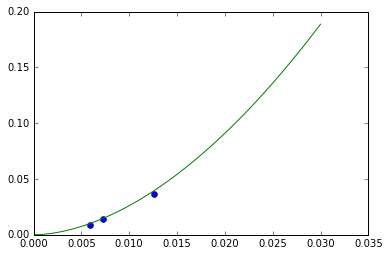

In [415]:
Cspan = linspace(0, 0.03)
k = 104
n = 1.8
plt.plot(CC, -rC, 'o', Cspan, k*Cspan**n)


Now calculate the volume from the kinetic expression

In [416]:
Qo = 4
P = 80 #kPa
yCo = 0.6
xC = 0.375

R = 8.314
T = 25 #C
T = T+273.15 #K

Fto = P*Qo/(R*T)
FCo = yCo*Fto
FDo = (1-yCo)*Fto
FC = FCo*(1-xC)
FD = FDo+4*(FCo-FC)
Q  = Qo*(FC+FD)/Fto
CC = FC/Q
rC = -k*CC**n

print([Fto, FCo, FDo, FC, FD, Q, CC])
#print(rC, CC)
V = (FCo-FC)/-rC
print('V=', V, 'L')

[0.1290937285419497, 0.07745623712516982, 0.05163749141677988, 0.04841014820323113, 0.16782184710453463, 6.700000000000001, 0.007225395254213601]
V= 1.995737538490755 L


## Question 4

The following irreversible gas phase reaction
$$ A\to2B$$
was studied using a packed bed of catalyst particles. Different runs were performed over the same catalyst bed, using different feed flowrates and different inlet compositions – see table below. All runs were performed at 60°C. Assuming that plug flow behaviour applies in the fixed bed reactor, determine how much of the catalyst will be required in a CSTR (catalyst in spinning basket) that converts 90% of a pure A stream of 20 mol/min. Assume power law kinetics apply  
($-r_A = kC_A^n$)

|Run|Inlet flowrate (l/min)|Percent A in inlet|Percent B in inlet|Pressure (bar)|Conversion of A|
|---|---|---|---|---|---|
|1 |30 |100 |0 |20 |80.7|
|2 |40 |80 |20 |20 |76.8|
|3 |50 |50 |50 |20 |68.8|

The following information is available:

- Mass of catalyst used - 20g

- Pressure of all runs (including CSTR) – 20 bar

- Packing density of the catalyst – 800g/l

Mole balance:
$$\frac{dF_i}{dW} = r_i' $$

Rates:
$$ r_A = -kC_A^n = -k\left(\frac{F_A}{Q}\right)^n$$

Ideal gas law:
$$PQ = FRT$$
$$ \frac{dQ}{dW} = \frac{RT}{P}\sum{\frac{dF_i}{dW}}$$

Information:

W = 20 g

P = 20 bar

$\rho_B$ = 800 g/L





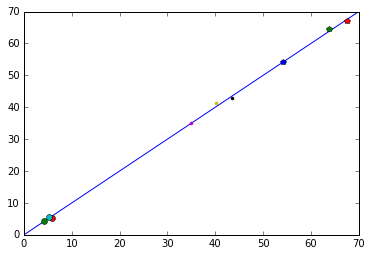

In [424]:
from numpy import array, append, linspace
import matplotlib.pyplot as plt
% matplotlib inline

Qo = array([30, 40, 50])
yAo = array([100, 80, 50])/100
yBo = array([0, 20, 50])/100
xA = array([80.7, 76.8, 68.8])/100
R = 8.314 #kPa.L/mol.K
T = 60 #C
T = T+273.15 #K
P = 20 #bar
P = P*100
W = 20 #g
Wspan = linspace(0, W)

def ri(var):
    FA, FB, Q = var
    rA = -k*(FA/Q)**n
    rB = -2*rA
    return [rA, rB]

def diffs(var, W):
    FA, FB, Q = var
    rA, rB = ri(var)
    dFAdW = rA
    dFBdW = rB
    dQdW = Qoi/Ftoi*(dFAdW+dFBdW)
    return [dFAdW, dFBdW, dQdW]

Fto = array([])
FAo = array([])
FBo = array([])
FA = array([])
FB = array([])
Q = array([])

for i in range(3):
    Fto = append(Fto, P*Qo[i]/(R*T))
    FAo = append(FAo, yAo[i]*Fto[i])
    FBo = append(FBo, yBo[i]*Fto[i])
    FA = append(FA, (1-xA[i])*FAo[i])
    FB = append(FB, FBo[i]+2*(FAo[i]-FA[i]))
    Q = append(Q, Qo[i]*(FA[i]+FB[i])/Fto[i])

k = 3.7
n = 1

Qoi = Qo[0]
Ftoi = Fto[0]
var1 = odeint(diffs, [FAo[0], FBo[0], Qo[0]], Wspan)
FA1 = var1[:, 0]
FB1 = var1[:, 1]
Q1 = var1[:, 2]

Qoi = Qo[1]
Ftoi = Fto[1]
var2 = odeint(diffs, [FAo[1], FBo[1], Qo[1]], Wspan)    
FA2 = var2[:, 0]
FB2 = var2[:, 1]
Q2 = var2[:, 2]

Qoi = Qo[2]
Ftoi = Fto[2]
var3 = odeint(diffs, [FAo[2], FBo[2], Qo[2]], Wspan)    
FA3 = var3[:, 0]
FB3 = var3[:, 1]
Q3 = var3[:, 2]

plt.plot([0, 70], [0, 70], FA1[-1], FA[0], 'o', FA2[-1], FA[1], 'o', FA3[-1], FA[2], 'o', FB1[-1], FB[0], '.', FB2[-1], FB[1], '.', FB3[-1], FB[2], '.', Q1[-1], Q[0], 'p', Q2[-1], Q[1], 'p', Q3[-1], Q[2], 'p')

#print([FA1[-1], FA[0]], [FA2[-1], FA[1]], [FA3[-1], FA[2]])
#print([FB1[-1], FB[0]], [FB2[-1], FB[1]], [FB3[-1], FB[2]])
#print([Q1[-1], Q[0]], [Q2[-1], Q[1]], [Q3[-1], Q[2]])
    

The reaction rate can therefore be described by:
$$ r_A = -3.7C_A $$

CSTR mole balance:

Mole balances:
$$ F_{Ao}-F_A = -r_A'W $$
$$ F_B = F_{Bo}+2(F_{Ao}-F_A)$$

rates:
$$r_A = -3.7C_A = -3.7\left(\frac{F_A}{Q}\right) $$

Ideal gas law:
$$Q = Q_o\frac{F_A+F_B}{F_{to}}$$

In [337]:
FAo = 20 #mol/min
FBo = 0
FA = FAo*(1-0.9) #mol/min
FB = FBo+2*(FAo-FA)
Fto = FAo+FBo
R = 8.314 #kPa.L/mol.K
T = 60 #C
T = T+273.15 #K
P = 20 #bar
P = P*100 #kPa
Qo = Fto*R*T/P #L/min
Q = Qo*(FA+FB)/Fto
rA = -3.7*(FA/Q)
W = (FAo-FA)/-rA
print ('W =', W, 'g')

W = 128.01009624324325 g
